## Necassary Imports

### You need to download the following packages:
- `pip install gym-super-mario-bros==7.3.0`
- `pip install nes-py==8.2.1`
- `pip install gym==0.21.0`

In [1]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
SIMPLE_MOVEMENT # This is the list of possible actions that our character can take

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

## Setup Our Mario Game

### Setting up our the environment

In [3]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
actions_before_wrapping = env.action_space # This is the number of possible actions that our character can take berfore wrapping
env = JoypadSpace(env,SIMPLE_MOVEMENT)

- Comparing Number of actions before and after the wrapper

- We can see that JoypadSpace wrapper reduces the action space from 256 discrete values to 7 discrete values which will make our model train faster

In [4]:
print("Number of actions before wrapping: ", actions_before_wrapping)
print("Number of actions after wrapping: ", env.action_space)

Number of actions before wrapping:  Discrete(256)
Number of actions after wrapping:  Discrete(7)


- This means that the game screen will be of size 240 x 256 x 3 (RGB) and the action space will be of size 7

In [5]:
print("Observation space: ", env.observation_space.shape)

Observation space:  (240, 256, 3)


- All the possible actions that we can take are:

In [6]:
print("Action List: ", SIMPLE_MOVEMENT)

Action List:  [['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B'], ['A'], ['left']]


### Game loop

In [7]:
done = True
for step in range(5): # remember to change this to 1000000
    if done:
        # starts the game or resets it if it is over
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample()) # random action
    env.render() # render the game to the screen
env.close() # closes the game window

c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


### Understanding the reward system

- Actions:
    - `env.action_space.sample()` returns a random action

    - `env.action_space.n` returns the number of actions

    - Since we have 7 actions, we can take any action from 0 to 6 & thus the `env.action_space.sample()` returns number from 0 to 6
- Step:
    `env.step(action)` 
    
    - The step function takes in an action and returns the next state, the reward for that action, whether the game is over or not and some additional information

    - Examples to clarify how step works:

    - `env.step(1)[0]` returns the next state

    - `env.step(1)[1]` returns the reward

    - `env.step(1)[2]` returns whether the game is over or not
    
    - `env.step(1)[3]` returns information after taking a specific action
- Reset:
    - `env.reset()` resets the environment and returns the initial state
- Info:
    - `env.step(1)[3]` returns information after taking a specific action
    - it returns a dictionary, the below table will illustrate the keys and their values:

        | Key | Type | Description |
        | --- | --- | --- |
        | coins | int | Number of coins collected |
        | flag_get | bool | True if the level was completed |
        | life | int | Remaining lives |
        | score | int | Current score |
        | stage | int | Current stage |
        | status | str | Level status |
        | time | int | Remaining time |
        | world | int | Current world |
        | x_pos | int | Mario's x position |
        | y_pos | int | Mario's y position |


#### Taking samples of the state, reward, done and info

In [8]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env,SIMPLE_MOVEMENT)
env.reset()

array([[[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       ...,

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [  0,   0,   0]],

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [228,  92,  16]]

In [9]:
env.step(1)[0] # returns the state of the game after taking action 0

array([[[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       ...,

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [  0,   0,   0]],

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [228,  92,  16]]

In [10]:
env.step(1)[1] # returns the reward after taking action 0

0.0

In [11]:
env.step(1)[2] # returns the done boolean after taking action 1

False

In [12]:
env.step(1)[3] # returns the info after taking action 1

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 400,
 'world': 1,
 'x_pos': 40,
 'x_pos_screen': 40,
 'y_pos': 79}

## Preprocessing The Environment

### Import for preprocessing
- You need to install the following:
    - PyTorch either CPU or GPU version
    - Stable Baselines 3:
        
        -  `pip install stable-baselines3==1.6.0`

- `from gym.wrappers import FrameStack, GrayScaleObservation`:
    
    - `GrayScaleObservation` is used to convert the RGB image to grayscale image



- `from stable_baselines.common.vec_env import VecFrameStack, DummyVecEnv`:
    
    - `VecFrameStack` make the environment vectorized and stacks the frames together
        
    - `DummyVecEnv` is used to make the environment vectorized

In [13]:
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
import matplotlib.pyplot as plt

### Applying Gray Scale

In [14]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env,SIMPLE_MOVEMENT)

In [15]:
initial_state = env.reset()

In [16]:
# GrayScale the environment
env = GrayScaleObservation(env,keep_dim=True)

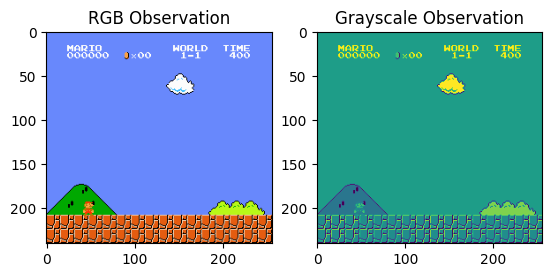

In [17]:
initial_state_grayscale = env.reset()
plt.subplot(1,2,1)
plt.imshow(initial_state)
plt.title("RGB Observation")
plt.subplot(1,2,2)
plt.imshow(initial_state_grayscale)
plt.title("Grayscale Observation")
plt.show()

In [18]:
print("Shape of initial state: ", initial_state.shape)
print("Shape of grayscale state: ", initial_state_grayscale.shape)

Shape of initial state:  (240, 256, 3)
Shape of grayscale state:  (240, 256, 1)


### Wrapping Gray Scale in the Dummy Environment

In [19]:
# Wrap inside a DummyVecEnv to support vectorized environments
env = DummyVecEnv([lambda: env])

In [20]:
initial_state_grayscale_wrapped = env.reset()
# compare the shapes
print("Shape of initial state: ", initial_state.shape)
print("Shape of initial state grayscale: ", initial_state_grayscale.shape)
print("Shape of initial state grayscale wrapped: ", initial_state_grayscale_wrapped.shape)

Shape of initial state:  (240, 256, 3)
Shape of initial state grayscale:  (240, 256, 1)
Shape of initial state grayscale wrapped:  (1, 240, 256, 1)


### Stacking Frames

In [21]:
env = VecFrameStack(env,n_stack=4, channels_order="last")

In [22]:
initial_state_grayscale_wrapped_stacked = env.reset()
# compare the shapes
print("Shape of initial state: ", initial_state.shape)
print("Shape of initial state grayscale: ", initial_state_grayscale.shape)
print("Shape of initial state grayscale wrapped: ", initial_state_grayscale_wrapped.shape)
print("Shape of initial state grayscale wrapped stacked: ", initial_state_grayscale_wrapped_stacked.shape)

Shape of initial state:  (240, 256, 3)
Shape of initial state grayscale:  (240, 256, 1)
Shape of initial state grayscale wrapped:  (1, 240, 256, 1)
Shape of initial state grayscale wrapped stacked:  (1, 240, 256, 4)


In [23]:
def Visualizing_Frames(initial_state, initial_state_grayscale, initial_state_grayscale_wrapped, initial_state_grayscale_wrapped_stacked):
    plt.figure(figsize=(15,15))
    plt.subplot(1,4,1)
    plt.imshow(initial_state)
    plt.title("RGB Observation")
    plt.subplot(1,4,2)
    plt.imshow(initial_state_grayscale)
    plt.title("Grayscale Observation")
    plt.subplot(1,4,3)
    plt.imshow(initial_state_grayscale_wrapped[0])
    plt.title("GrayScale Wrapped")
    plt.subplot(1,4,4)
    plt.imshow(initial_state_grayscale_wrapped_stacked[0])
    plt.title("GrayScale Wrapped Stacked")
    plt.show()

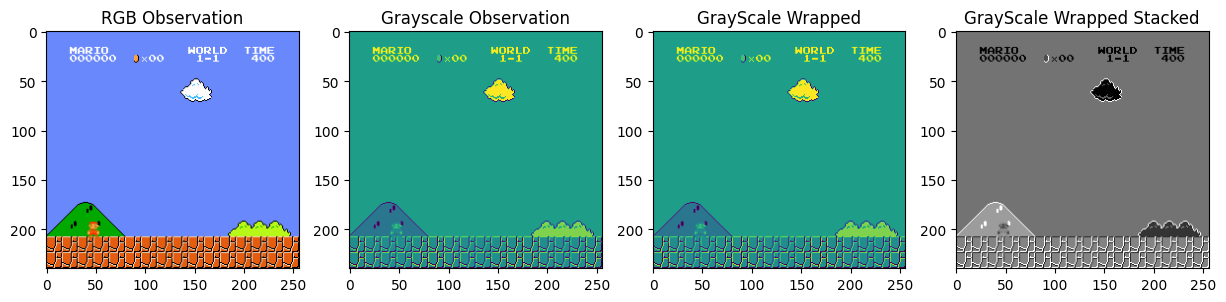

In [24]:
Visualizing_Frames(initial_state, initial_state_grayscale, initial_state_grayscale_wrapped, initial_state_grayscale_wrapped_stacked)

- Note -> The state changes each time we take an action or a step thats why the stacked frames are different & have different viusal information as we applied steps only on the vectorized stacked frames

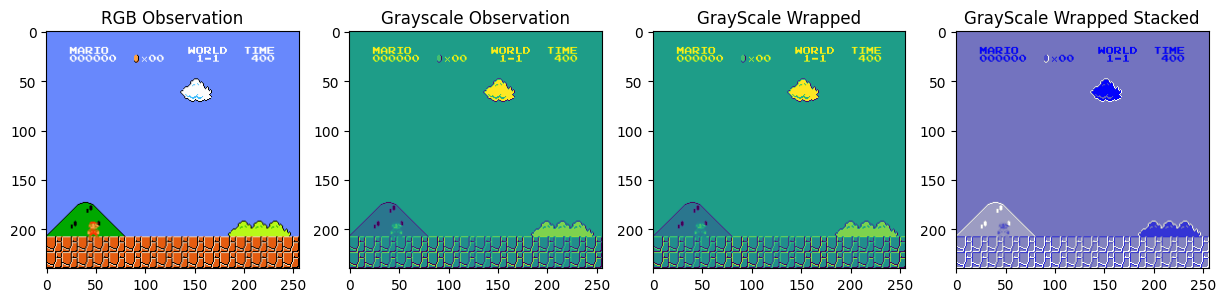

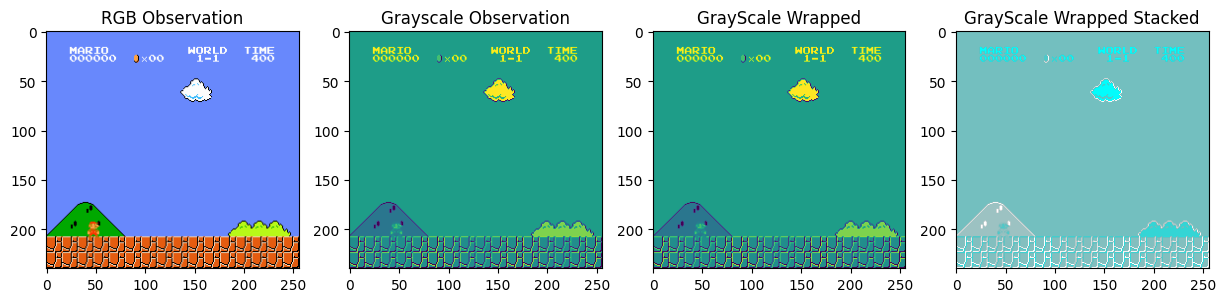

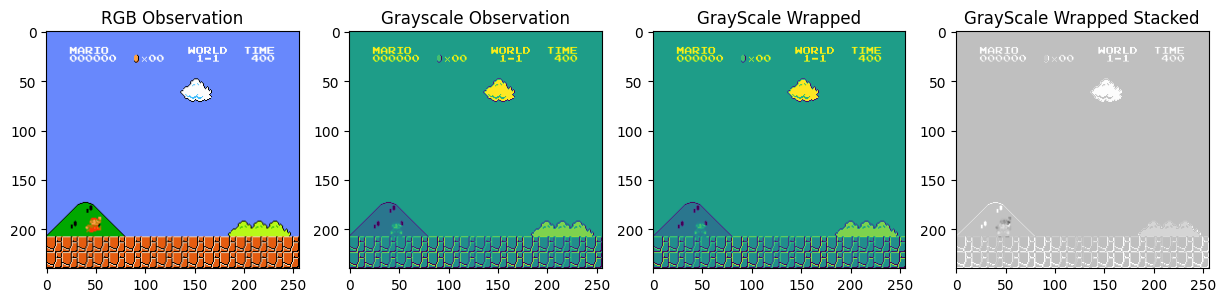

In [25]:
# each step we take the stacked frames change & thus we will have new state
for i in range(3):
    initial_state_grayscale_wrapped_stacked,_,__,___ = env.step([env.action_space.sample()])
    # Visualizing all frames 
    Visualizing_Frames(initial_state, initial_state_grayscale, initial_state_grayscale_wrapped, initial_state_grayscale_wrapped_stacked)